# Pytorch基础学习之CNN相关

## 第一部分网络搭建的基础  
参照 Deeplizard《Pytorch神经网络高效入门教程》学习

In [1]:
import torch.nn as nn

In [2]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        self.fc1=nn.Linear(in_features=12*4*4,out_features=120)#经过了filter和maxpooling操作
        self.fc2=nn.Linear(in_features=120,out_features=60)
        self.out=nn.Linear(in_features=60,out_features=10)#output layers
    def forward(self,t):
        # implement the forward pass
        return t

In [3]:
network=Network()
network  #涉及到__repr__ 函数的调用输出形式可以自己重写函数

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

_repr_ 函数的用法与覆盖

In [8]:
class Network1():
    def __init__(self):
        # super(Network1, self).__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        self.fc1=nn.Linear(in_features=12*4*4,out_features=120)#经过了filter和maxpooling操作
        self.fc2=nn.Linear(in_features=120,out_features=60)
        self.out=nn.Linear(in_features=60,out_features=10)#output layers
    def forward(self,t):
        # implement the forward pass
        return t
    
    def __repr__(self):
        return "lizard"  

In [7]:
#不改写
network1=Network1()
network1

In [9]:
#改写
network1=Network1()
network1

lizard

访问指定层

In [10]:
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [11]:
network.conv1.weight

Parameter containing:
tensor([[[[ 0.0819,  0.0165, -0.1102,  0.0557, -0.1321],
          [ 0.1975,  0.1330,  0.1095,  0.1727, -0.1761],
          [-0.1314,  0.1002, -0.0591,  0.0551,  0.1289],
          [-0.1546, -0.0376,  0.1132, -0.0135, -0.0256],
          [ 0.1942,  0.0729, -0.0006, -0.1805, -0.0635]]],


        [[[-0.0934, -0.1438,  0.0004,  0.1164, -0.0654],
          [-0.0573, -0.1397, -0.0870, -0.0745,  0.1066],
          [-0.0537,  0.1668,  0.0711,  0.0594, -0.0189],
          [-0.1393, -0.0151, -0.0424, -0.0855,  0.1032],
          [-0.1415,  0.0726,  0.0534,  0.1147, -0.1948]]],


        [[[ 0.0009,  0.1197, -0.0157,  0.1552, -0.0939],
          [-0.1118,  0.1570, -0.0559, -0.1235,  0.1353],
          [ 0.0529, -0.1504, -0.0429,  0.0859,  0.1149],
          [ 0.0722,  0.1861, -0.1593, -0.1789,  0.0168],
          [ 0.1568,  0.1421,  0.1871,  0.1068,  0.0735]]],


        [[[ 0.0672,  0.0932,  0.1609,  0.0375, -0.0056],
          [ 0.0526, -0.1406,  0.1681,  0.1600, -0.1166

In [12]:
# 输出conv1权重的形状
network.conv1.weight.shape  

torch.Size([6, 1, 5, 5])

In [13]:
network.fc1.weight

Parameter containing:
tensor([[ 0.0014, -0.0585,  0.0669,  ...,  0.0100,  0.0586,  0.0375],
        [ 0.0083, -0.0306, -0.0159,  ...,  0.0421, -0.0609,  0.0668],
        [ 0.0139, -0.0373,  0.0006,  ...,  0.0347,  0.0690, -0.0181],
        ...,
        [-0.0380,  0.0383,  0.0060,  ..., -0.0297,  0.0043,  0.0079],
        [-0.0455,  0.0537, -0.0023,  ...,  0.0037,  0.0499, -0.0104],
        [ 0.0155, -0.0201, -0.0123,  ...,  0.0082,  0.0537, -0.0445]],
       requires_grad=True)

In [14]:
#fc1: in_features=12*4*4 out_features=120
network.fc1.weight.shape # 对于全连接层，由于需要flatten的张量输入，故此时的权重张量是个秩为2的高度、宽度轴
#要注意这里input维度在前 output维度在后

torch.Size([120, 192])

1. 为了追踪网络中的所有权重张量，pytorch有一个叫Parameter的类，该类扩展了Tensor类， 所以每一层的权重张量就是这个参数类的一个实例  
2. 权重矩阵定义了线性函数(线性映射)

In [16]:
#接上部分network
#访问所有参数
#method 1
for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [19]:
#method 2
for name,param in network.named_parameters():
    print(name,'\t\t',param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


可调用模块

In [22]:
import torch
in_features = torch.tensor([1,2,3,4],dtype=torch.float32)
weight_matrix = torch.tensor([[1,2,3,4],
                              [2,3,4,5],
                              [3,4,5,6]],dtype=torch.float32)
weight_matrix.matmul(in_features)
#将上述的权重矩阵看作是一个线性映射（函数），其实现过程与pytorch中的线性层一样

tensor([30., 40., 50.])

In [24]:
fc=nn.Linear(in_features=4,out_features=3)
# pytorch 线性层通过将数字4和3传递给构造函数，以创建一个3x4的权重矩阵
fc(in_features)#随机结果

tensor([-1.8789,  3.8741, -1.8820], grad_fn=<AddBackward0>)

In [25]:
fc_with_bias = nn.Linear(in_features=4,out_features=3,bias=True)#bias默认是True
fc_with_bias.weight=nn.Parameter(weight_matrix)
fc_with_bias(in_features)#会有bias的作用

tensor([29.8041, 39.5712, 50.3035], grad_fn=<AddBackward0>)

In [26]:
fc_without_bias = nn.Linear(in_features=4,out_features=3,bias=False)
fc_without_bias.weight=nn.Parameter(weight_matrix)
fc_without_bias(in_features)#与矩阵乘法的结果完全相同

tensor([30., 40., 50.], grad_fn=<SqueezeBackward3>)

forward method

In [44]:
#前向方法的实现将使用我们在构造函数中定义的所有层
#前向方法实际上是输入张量到预测的输出张量的映射
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        self.fc1=nn.Linear(in_features=12*4*4,out_features=120)#经过了filter和maxpooling操作
        self.fc2=nn.Linear(in_features=120,out_features=60)
        self.out=nn.Linear(in_features=60,out_features=10)#output layers
    def forward(self,t):
        # implement the forward pass
        #(1) input layer
        t=t
        #(2) hidden conv layer1
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2,stride=2)
        #(3) hidden conv layer2
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size=2,stride=2)
        #(4) hidden linear layer1
        t=t.reshape(-1,12*4*4)
        # print("the shape of output of conv2 after reshape is"+t.shape)
        t = self.fc1(t)
        t = F.relu(t)
        #(5) hidden linear layer2
        t = self.fc2(t)
        t = F.relu(t)
        #(6) output layer
        t = self.out(t)
        return t
        # t= F.softmax(t, dim=1)  # 这里暂不使用softmax，在训练中使用交叉熵损失可隐式的表示softmax
        # 在隐藏层中，通常使用relu作为非线性激活函数
        # 在输出层，有类别要预测时，使用

模型训练——单张图像的训练

In [30]:
import torchvision
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)

In [31]:
train_set=torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
    )

100%|██████████| 26421880/26421880 [02:06<00:00, 208057.87it/s]


Extracting ./data/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 62372.94it/s]


Extracting ./data/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:09<00:00, 484189.64it/s]


Extracting ./data/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5160678.06it/s]

Extracting ./data/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw



In [32]:
torch.set_grad_enabled(False)

In [33]:
sample = next(iter(train_set))

image,label=sample
image.shape

torch.Size([1, 28, 28])

In [36]:
import matplotlib.pyplot as plt

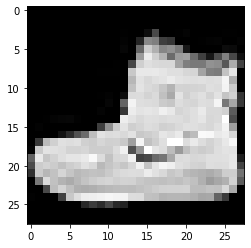

In [37]:
# 显示图像和标签
plt.imshow(image.squeeze(), cmap='gray')    # 将[1, 28, 28]->[28,28]
#print('label:', label)
# 如上我们得到的图像的形状为[1,28,28];而网络期望的张量是【batchsize,channels, height, width】
# 需要使用unsqueeze方法来为其增加一个维度

In [38]:
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [42]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features = 12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features = 60, out_features=10)
    def forward(self, t):
        # （1）Input Layer
        t = t
        # (2) hidden conv1
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # (3) hidden conv2 
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        # (4) hidden linear1
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        # (5) hidden linear2
        t = self.fc2(t)
        t = F.relu(t)
        # (6) output
        t = self.out(t)
        return t

In [45]:
network=Network()
pred = network(image.unsqueeze(0))
print(pred.shape)
print(pred)
print(pred.argmax(dim=1))
print(label)

torch.Size([1, 10])
tensor([[ 0.0707,  0.0721, -0.0535, -0.0771, -0.0631,  0.1027, -0.0170, -0.1018, -0.1150, -0.0690]])
tensor([5])
9


In [47]:
#using softmax
pred=F.softmax(pred,dim=1)
pred #pred.sum()=1

tensor([[0.1010, 0.1010, 0.0997, 0.0995, 0.0996, 0.1013, 0.1000, 0.0992, 0.0991, 0.0995]])